In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

### Se importan los datos

(60000, 28, 28) (60000,)


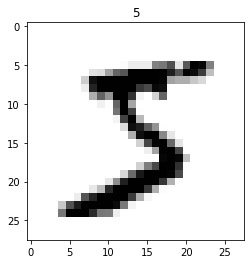

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Imprime los tamanios de la matriz, y_train.shape() devuelve una sola componente pues son los resultados. 
print(X_train.shape, y_train.shape)
plt.title(y_train[0])
plt.imshow(X_train[0], cmap= 'binary')

### Preprocesamiento de datos 

In [3]:
#Se normalizan las imagenes RBG diviendo entre 255
X_train = X_train.astype(np.float32)/255 
X_test = X_test.astype(np.float32)/255 

#Se expande la dimension de las matrices para que el algoritmo pueda trabajar con ellas
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
#Se convierten los vectores de resultados a matrices categoricas
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

### Modelo

In [21]:
batch_size = 128
num_classes = 10
epochs = 50

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape= (28,28, 1)))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

#La matriz de pooling se vuelve unidimensional (un vector)
model.add(Flatten())

#Previene overfitting
model.add(Dropout(0.5))

#Fully connected output layer 
model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [23]:
#Callbacks para monitorear overfitting
from keras import callbacks

es = callbacks.EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 4, verbose= 1)

mc = callbacks.ModelCheckpoint("./mnist.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True)

cb = [es, mc]

In [24]:
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split= 0.3, callbacks= cb, validation_data=(X_test, y_test))
print("The model has successfully trained")

Epoch 1/50
469/469 [==============================] - ETA: 0s - loss: 2.2953 - accuracy: 0.1208
Epoch 1: val_accuracy improved from -inf to 0.16690, saving model to .\mnist.h5
469/469 [==============================] - 39s 83ms/step - loss: 2.2953 - accuracy: 0.1208 - val_loss: 2.2768 - val_accuracy: 0.1669
Epoch 2/50
469/469 [==============================] - ETA: 0s - loss: 2.2650 - accuracy: 0.1774
Epoch 2: val_accuracy improved from 0.16690 to 0.27730, saving model to .\mnist.h5
469/469 [==============================] - 39s 84ms/step - loss: 2.2650 - accuracy: 0.1774 - val_loss: 2.2443 - val_accuracy: 0.2773
Epoch 3/50
469/469 [==============================] - ETA: 0s - loss: 2.2314 - accuracy: 0.2510
Epoch 3: val_accuracy improved from 0.27730 to 0.41300, saving model to .\mnist.h5
469/469 [==============================] - 41s 87ms/step - loss: 2.2314 - accuracy: 0.2510 - val_loss: 2.2071 - val_accuracy: 0.4130
Epoch 4/50
469/469 [==============================] - ETA: 0s - los